# Make Nice Plots Used Reduced Outputs

- Run using python 3.9
- If a package is not installed do `!{sys.executable} -m pip install <module>`

In [1]:
import sys, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
import scipy
import pickle 
import uproot
print(uproot.__version__)

5.1.2


In [2]:
## -------------------------------- ##
##        SET PLOTTING STYLE        ##
## -------------------------------- ##
matplotlib.rcParams['figure.figsize'] = 8.5,6
matplotlib.rcParams['figure.subplot.left'] = 0.15
matplotlib.rcParams['figure.subplot.right'] = 0.88
matplotlib.rcParams['figure.subplot.bottom'] = 0.15
matplotlib.rcParams['figure.subplot.top'] = 0.88
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.labelweight'] = 'normal'
matplotlib.rcParams['font.weight'] = 'normal' 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['xtick.minor.visible'] = True 
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['xtick.direction'] = 'in' 
matplotlib.rcParams['ytick.direction'] = 'in' 
matplotlib.rcParams['xtick.top'] = True 
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['xtick.major.pad'] = 6
matplotlib.rcParams['image.cmap'] = 'viridis'

In [3]:
## ----------------------------------------- ##
##       READ IN DICTS TO MAKE PLOTS         ##
## ----------------------------------------- ##

with open('Data/Beta_5.0keV_data.pkl', 'rb') as inFile:
    dictList = pickle.load(inFile)

inFile.close()

nEvents = len(dictList['primaryParticleEnergy'])
print(nEvents, 'events in file')

100000 events in file


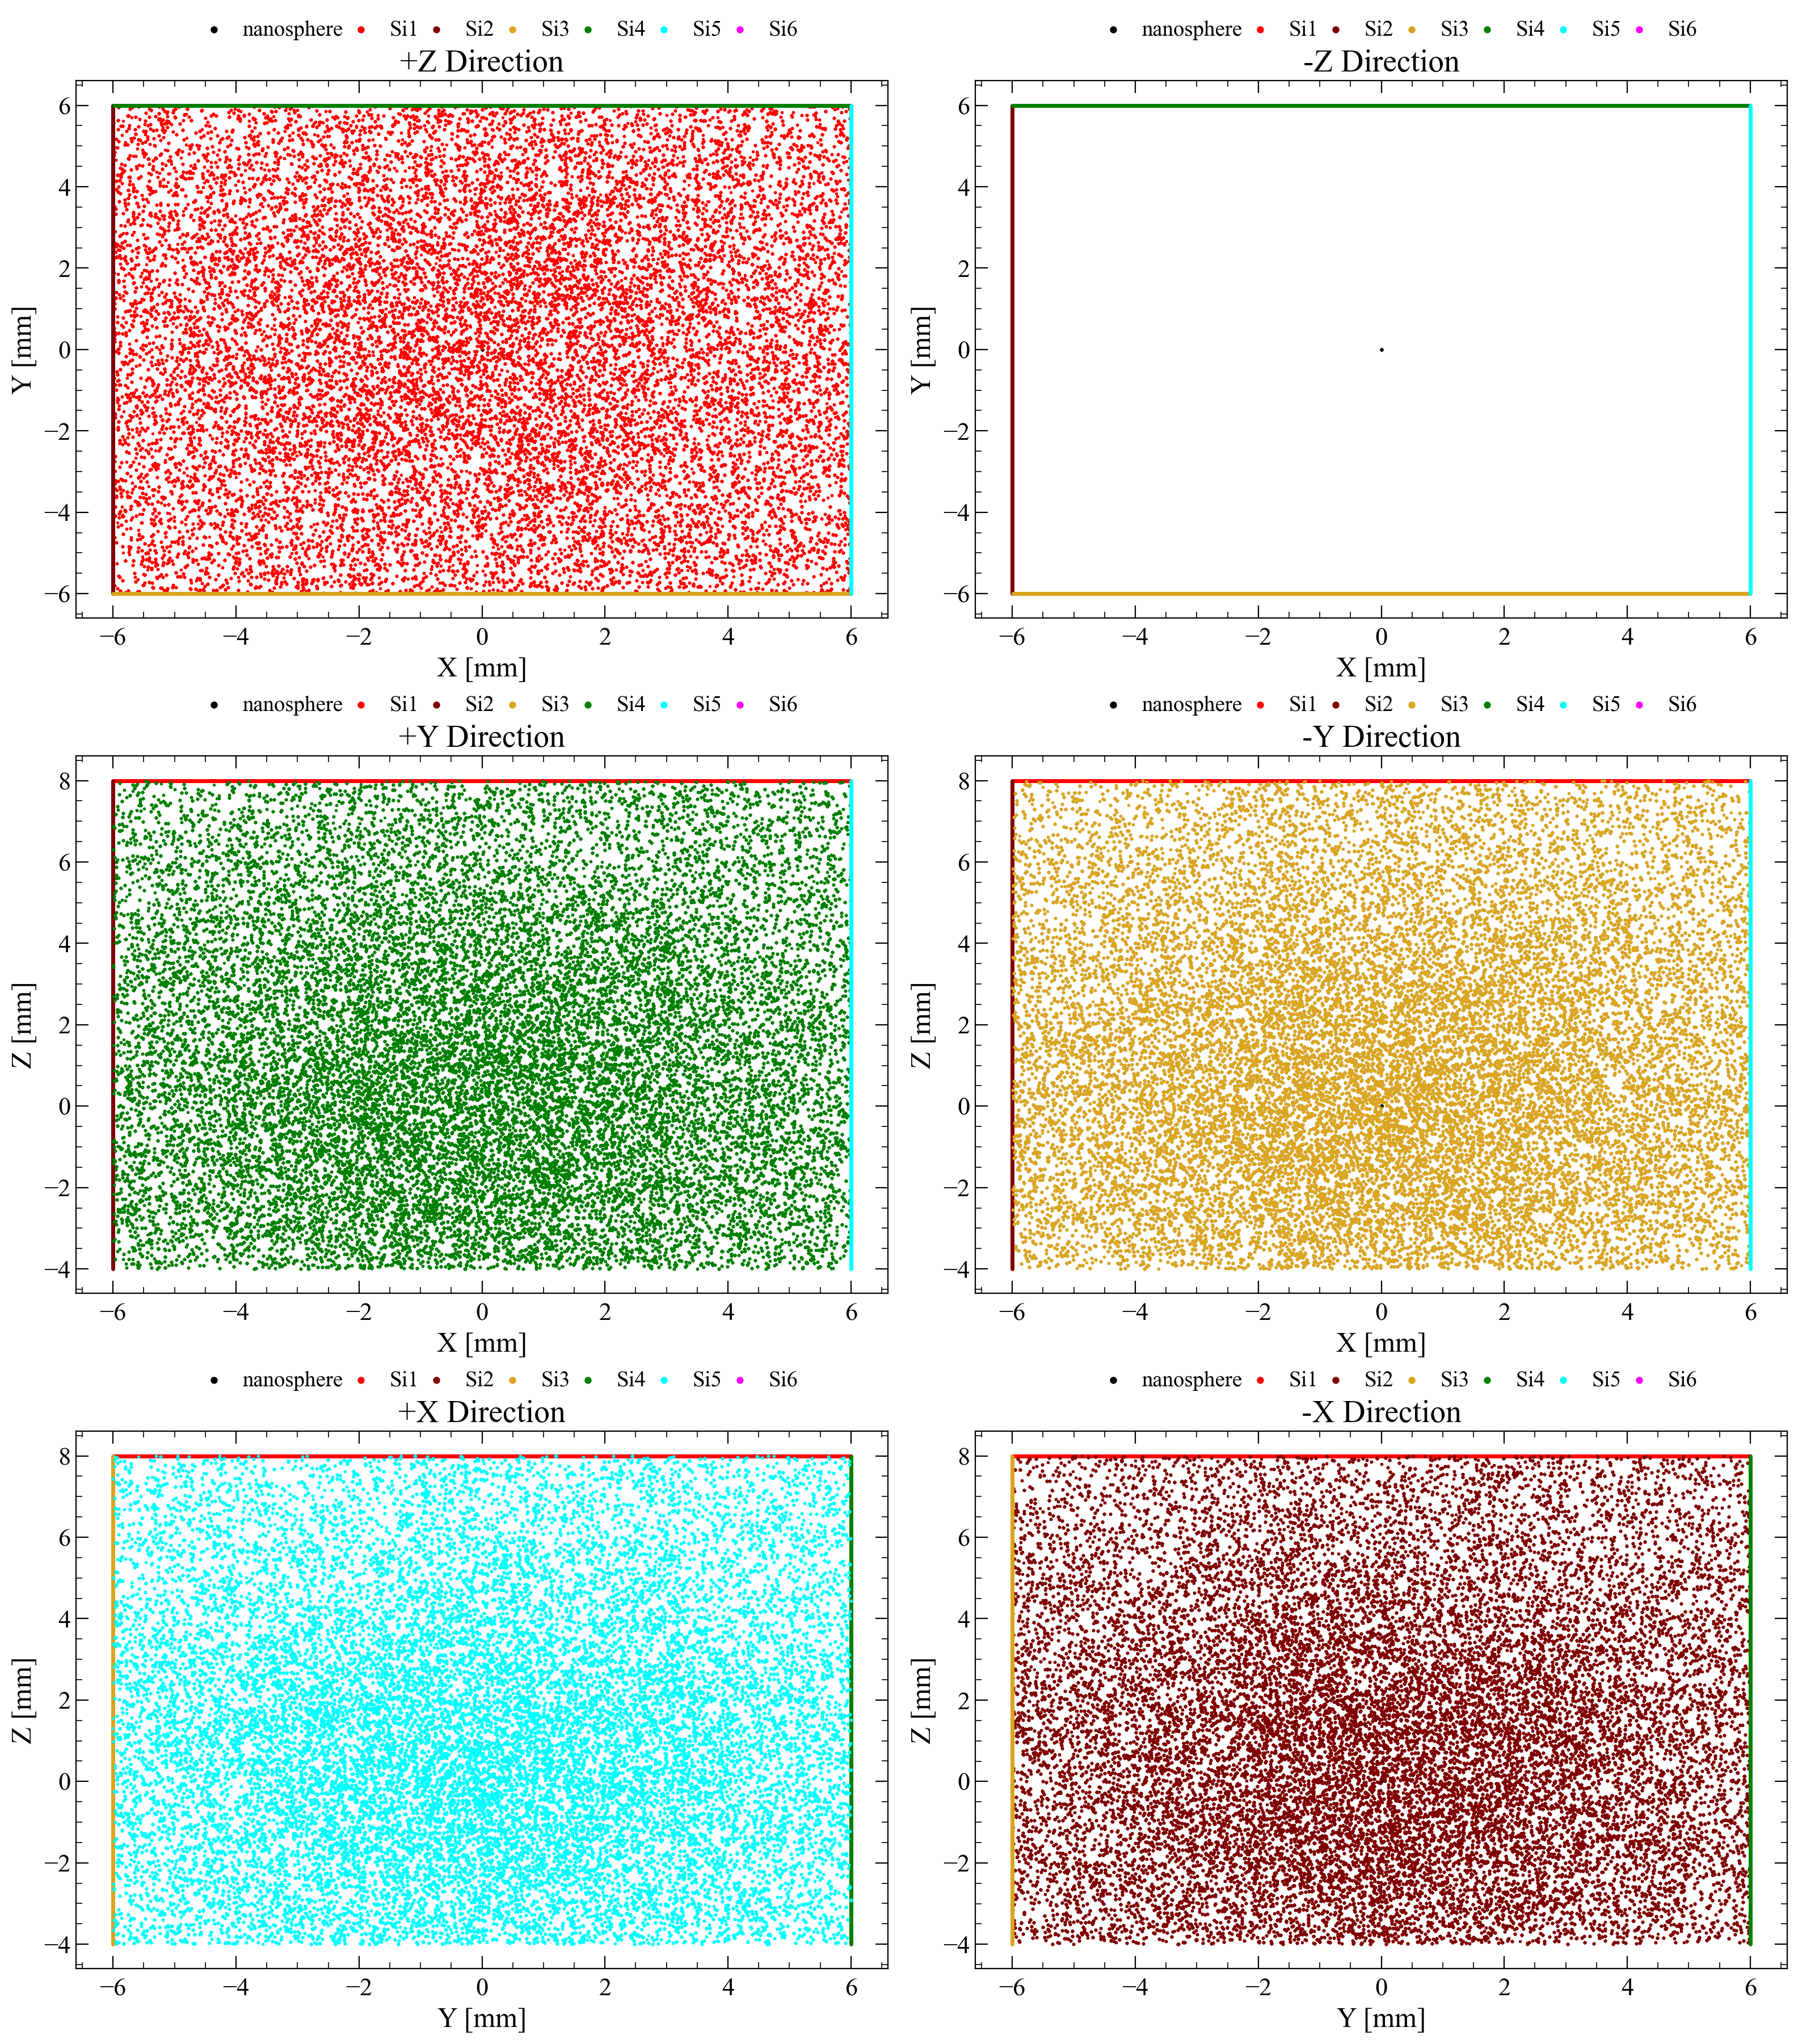

In [4]:
## ---------------------------------- ##
##  PLOT PHYSICAL DETECTOR GEOMETRY   ##
##  USING ALL INTERACTION VERTICES    ##
## ---------------------------------- ##

volColorMap = {"nanosphere":'black', "Si1":'red', "Si2":'maroon', "Si3":'goldenrod', "Si4":'green', "Si5":'cyan', "Si6":'magenta'}

fig, ax = plt.subplots(3,2, figsize=(16,18), dpi=200)

for vol in dictList['detPositions_mm']:
    pos = dictList['detPositions_mm'][vol]

    x_mm, y_mm, z_mm = [], [], []
    [x_mm.append(pos[i][0]) for i in range(len(pos))]
    [y_mm.append(pos[i][1]) for i in range(len(pos))]
    [z_mm.append(pos[i][2]) for i in range(len(pos))]
    x_mm = np.array(x_mm)
    y_mm = np.array(y_mm)
    z_mm = np.array(z_mm)
    
    r_mm = np.sqrt(x_mm*x_mm + y_mm*y_mm)

    if vol=="nanosphere":
        mSize = 3
    else:
        mSize = 3
    
    ## XY in +Z Direction
    ax[0,0].scatter(x_mm[z_mm>0.], y_mm[z_mm>0.], marker='.', s=mSize, color=volColorMap[vol], label=vol)

    ## XY in -Z Direction
    ax[0,1].scatter(x_mm[z_mm<0.], y_mm[z_mm<0.], marker='.', s=mSize, color=volColorMap[vol], label=vol)

    ## XZ in +Y Direction
    ax[1,0].scatter(x_mm[y_mm>0.], z_mm[y_mm>0.], marker='.', s=mSize, color=volColorMap[vol], label=vol)

    ## XZ in -Y Direction
    ax[1,1].scatter(x_mm[y_mm<0.], z_mm[y_mm<0.], marker='.', s=mSize, color=volColorMap[vol], label=vol)

    ## YZ in +X Direction
    ax[2,0].scatter(y_mm[x_mm>0.], z_mm[x_mm>0.], marker='.', s=mSize, color=volColorMap[vol], label=vol)

    ## YZ in -X Direction
    ax[2,1].scatter(y_mm[x_mm<0.], z_mm[x_mm<0.], marker='.', s=mSize, color=volColorMap[vol], label=vol)


## XY in +Z Direction
ax[0,0].set_title('+Z Direction')
ax[0,0].set_xlabel('X [mm]')
ax[0,0].set_ylabel('Y [mm]')
ax[0,0].legend(frameon=False, bbox_to_anchor=(0,1.03,0.9,0.1), ncol=7, borderaxespad=0, markerscale=4.,
               fontsize=14, labelspacing=0.3, columnspacing=0.3, handlelength=1.)

## XY in -Z Direction
ax[0,1].set_title('-Z Direction')
ax[0,1].set_xlabel('X [mm]')
ax[0,1].set_ylabel('Y [mm]')
ax[0,1].legend(frameon=False, bbox_to_anchor=(0,1.03,0.9,0.1), ncol=7, borderaxespad=0, markerscale=4.,
               fontsize=14, labelspacing=0.3, columnspacing=0.3, handlelength=1.)

## XZ in +Y Direction
ax[1,0].set_title('+Y Direction')
ax[1,0].set_xlabel('X [mm]')
ax[1,0].set_ylabel('Z [mm]')
ax[1,0].legend(frameon=False, bbox_to_anchor=(0,1.03,0.9,0.1), ncol=7, borderaxespad=0, markerscale=4.,
               fontsize=14, labelspacing=0.3, columnspacing=0.3, handlelength=1.)

## XZ in -Y Direction
ax[1,1].set_title('-Y Direction')
ax[1,1].set_xlabel('X [mm]')
ax[1,1].set_ylabel('Z [mm]')
ax[1,1].legend(frameon=False, bbox_to_anchor=(0,1.03,0.9,0.1), ncol=7, borderaxespad=0, markerscale=4.,
               fontsize=14, labelspacing=0.3, columnspacing=0.3, handlelength=1.)

## YZ in +X Direction
ax[2,0].set_title('+X Direction')
ax[2,0].set_xlabel('Y [mm]')
ax[2,0].set_ylabel('Z [mm]')
ax[2,0].legend(frameon=False, bbox_to_anchor=(0,1.03,0.9,0.1), ncol=7, borderaxespad=0, markerscale=4.,
               fontsize=14, labelspacing=0.3, columnspacing=0.3, handlelength=1.)

## YZ in -X Direction
ax[2,1].set_title('-X Direction')
ax[2,1].set_xlabel('Y [mm]')
ax[2,1].set_ylabel('Z [mm]')
ax[2,1].legend(frameon=False, bbox_to_anchor=(0,1.03,0.9,0.1), ncol=7, borderaxespad=0, markerscale=4.,
               fontsize=14, labelspacing=0.3, columnspacing=0.3, handlelength=1.)

fig.tight_layout()

{1: [[680702432723146.1, 0.0, 0.0, 0.0]], 2: [[680702432723146.1, -1.2927110607718146e-07, 3.8038389582502375e-08, 1.3510147650441142e-07]], 3: [[680702432723146.1, 1.504000422486407e-07, 5.521702226671362e-08, 1.0412464076030288e-07]], 4: [[680702432723146.1, -1.1324225765184059e-07, 5.3448093225689933e-08, -1.9810947251535265e-08]], 5: [[680702432723146.1, 7.423336540485165e-08, -1.0227288202569361e-07, -2.609634951421159e-08]], 6: [[680702432723146.1, -8.717307102840353e-07, -2.3043951508089713e-07, 4.2001058369702633e-07], [680702432723146.1, -3.3362635567839634e-06, -6.645838505137889e-07, 1.7455459322558285e-06]], 7: [[680702432723146.1, -6.978136419656441e-06, 9.75562278123627e-06, 3.424136187771117e-05], [680702432723146.1, -1.0078062591083044e-05, 1.6266404195522e-05, 6.803377331498493e-05], [680702432723146.1, -1.1513220262609253e-05, 1.7033145409573597e-05, 7.291772198358437e-05], [680702432723146.1, -1.4729866181626991e-05, 1.7359008330381955e-05, 7.897831995600657e-05], [6

(-13.0, 13.0)

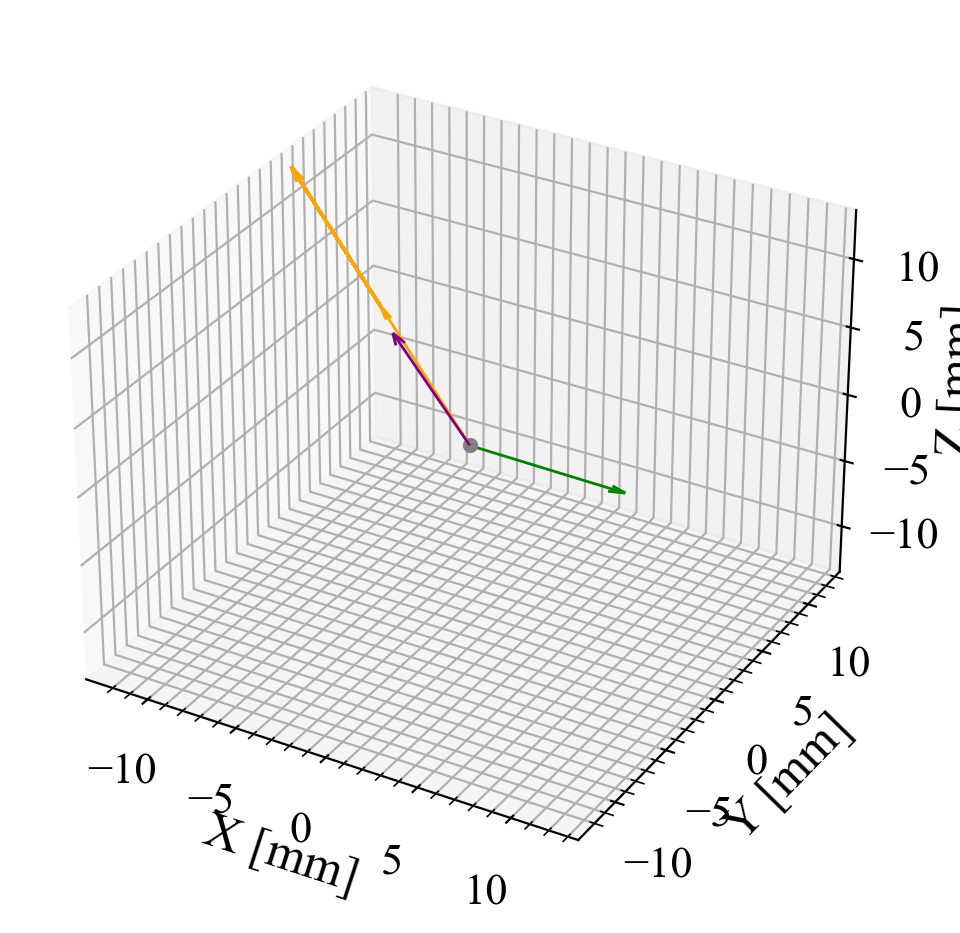

In [51]:
## ---------------------------------- ##
##             DRAW TRACKS            ##
## ---------------------------------- ##

## sort dictionaries by track IDs
myKeys = list(dictList['tracks_steps_hit3ccds'][0].keys())
myKeys.sort()
sorted_dict = {i: dictList['tracks_steps_hit3ccds'][0][i] for i in myKeys}
print(sorted_dict)

## plotting colors
color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'gold', 'gray', 'gray']
counter = 0
## time order list
def ListTimeOrder(array):
    return array[0]

## pythagorean distnace
def stepDistance(arr1, arr2):
    return np.sqrt( (abs(arr2[1]-arr1[1]))**2 + (abs(arr2[2]-arr1[2]))**2 + (abs(arr2[3]-arr1[3]))**2 )

## initialize plot

ax = plt.figure(figsize=(9,6), dpi=200).add_subplot(projection='3d')

for idx, (trackID, step) in enumerate(sorted_dict.items()):

    if len(step) == 1: continue
    
    timeOrdered_steps = sorted(step, key=ListTimeOrder)
    print(timeOrdered_steps)

    for jdx in range(len(timeOrdered_steps)-1):
        step0 = timeOrdered_steps[jdx]
        step1 = timeOrdered_steps[jdx+1]
        stepLength = stepDistance(step0, step1)
    
        ax.quiver(step0[1], step0[2], step0[3], step1[1], step1[2], step1[3], arrow_length_ratio=0.1, lw=1, color=color_list[counter])

    ## add a count
    counter +=1

## Plot formatting
ax.scatter(0., 0., 0., color='grey')

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')

ax.set_xlim(-13,13)
ax.set_ylim(-13,13)
ax.set_zlim(-13,13)

In [ ]:
## ---------------------------------- ##
##        PLOT PRIMARY POSITION       ##
## ---------------------------------- ##

fig, ax = plt.subplots(1,2, figsize = (17,6), dpi=200)

ax[0].scatter(dictList['primaryX_mm'], dictList['primaryY_mm'], color='black', s=5, alpha=0.8)
ax[1].scatter(dictList['primaryX_mm'], dictList['primaryZ_mm'], color='black', s=5, alpha=0.8)

ax[0].set_xlabel('X [mm]')
ax[0].set_ylabel('Y [mm]')

ax[1].set_xlabel('X [mm]')
ax[1].set_ylabel('Z [mm]')

fig.tight_layout()

In [ ]:
## ---------------------------------- ##
##       PLOT PRIMARY DIRECTION       ##
## ---------------------------------- ##
fig, ax = plt.subplots(1,3, figsize = (25.5,6), dpi=400)

ax[0].hist(dictList['primaryDirX'], bins=20, range=[-1.,1.], histtype='step', lw=2, color='black')
ax[1].hist(dictList['primaryDirY'], bins=20, range=[-1.,1.], histtype='step', lw=2, color='black')
ax[2].hist(dictList['primaryDirZ'], bins=20, range=[-1.,1.], histtype='step', lw=2, color='black')

ax[0].set_xlabel('X [mm]')

ax[1].set_xlabel('Y [mm]')

ax[2].set_xlabel('Z [mm]')

fig.tight_layout()

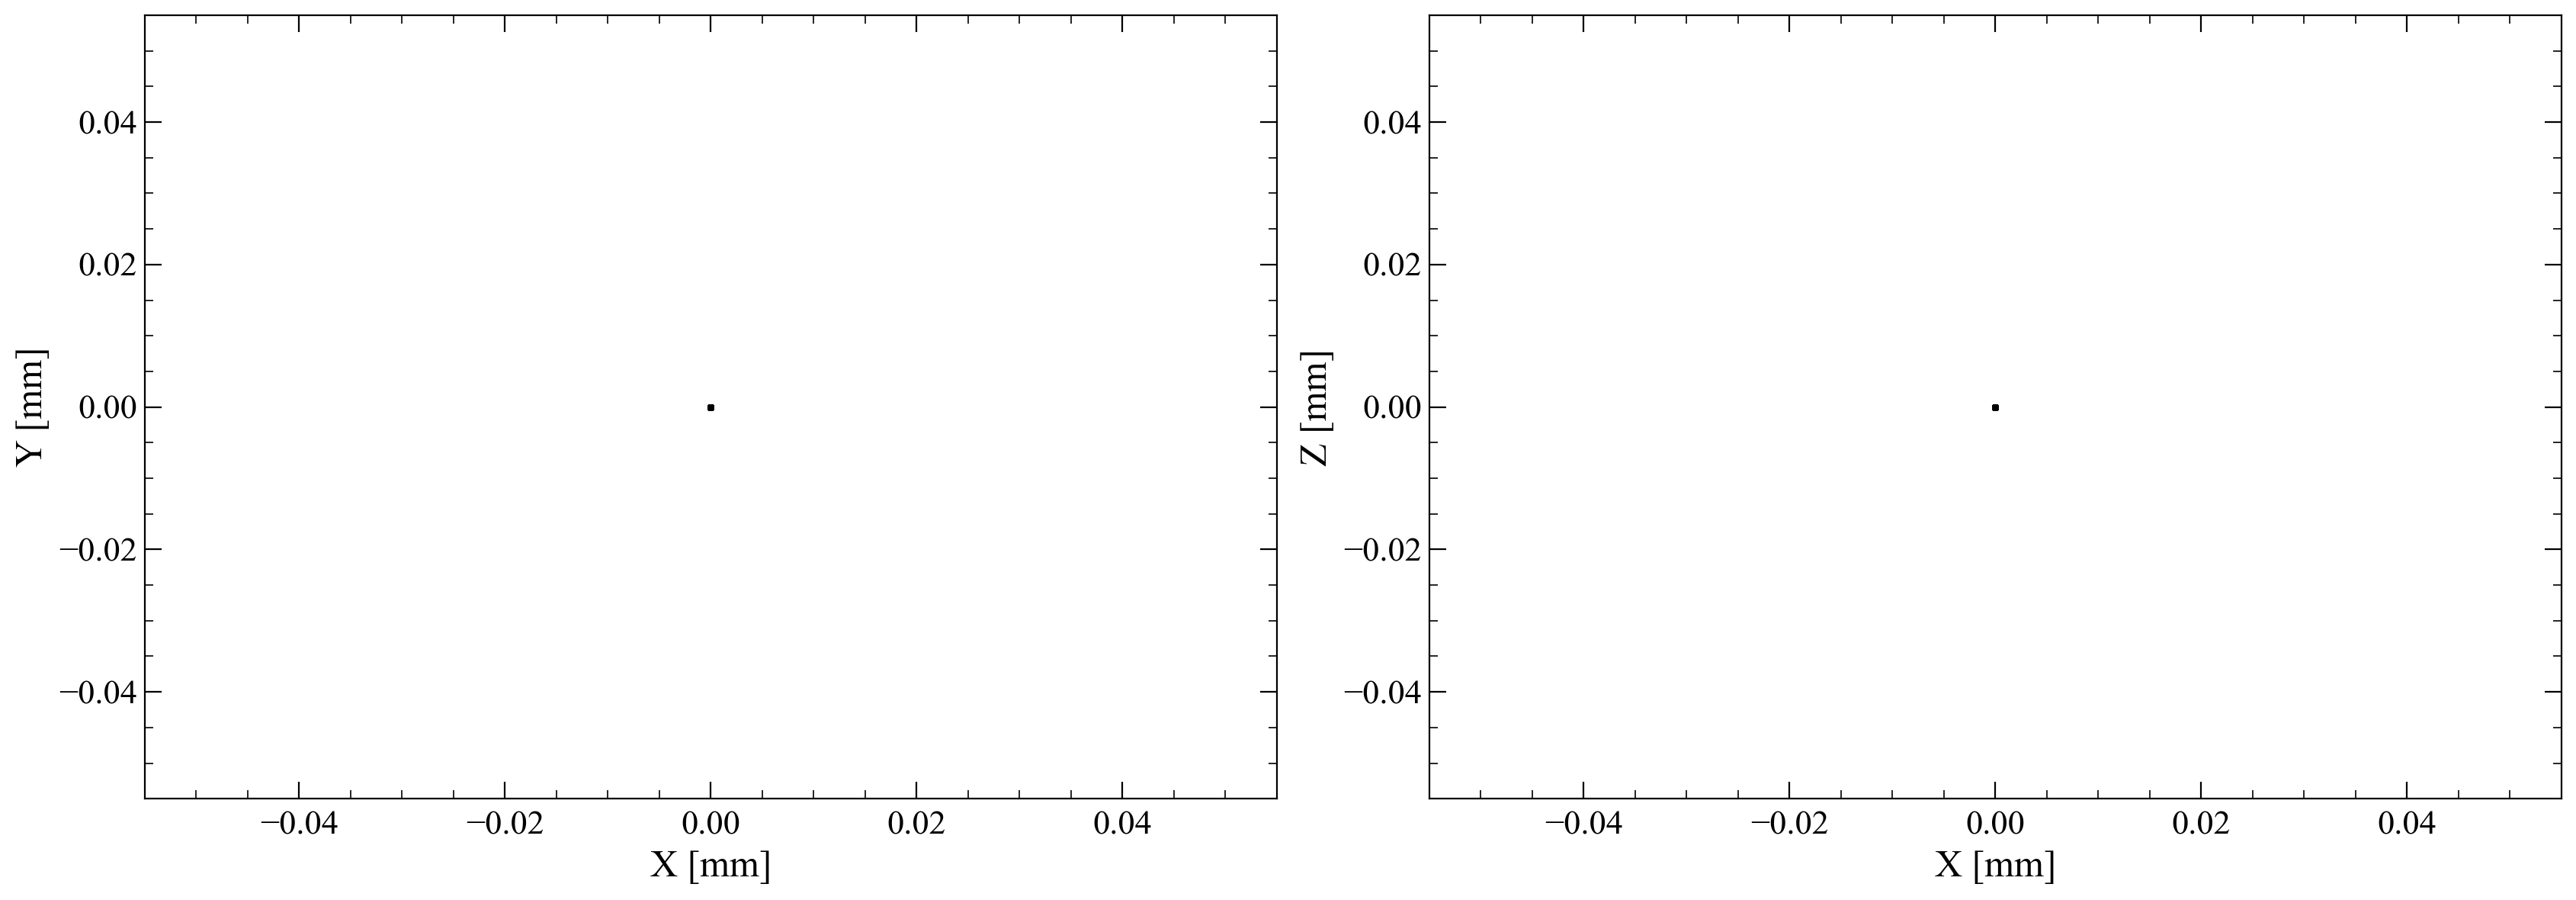

In [16]:
## ---------------------------------- ##
##        PLOT PRIMARY POSITION       ##
## ---------------------------------- ##

fig, ax = plt.subplots(1,2, figsize = (17,6), dpi=200)

ax[0].scatter(dictList['primaryX_mm'], dictList['primaryY_mm'], color='black', s=5, alpha=0.8)
ax[1].scatter(dictList['primaryX_mm'], dictList['primaryZ_mm'], color='black', s=5, alpha=0.8)

ax[0].set_xlabel('X [mm]')
ax[0].set_ylabel('Y [mm]')

ax[1].set_xlabel('X [mm]')
ax[1].set_ylabel('Z [mm]')

fig.tight_layout()

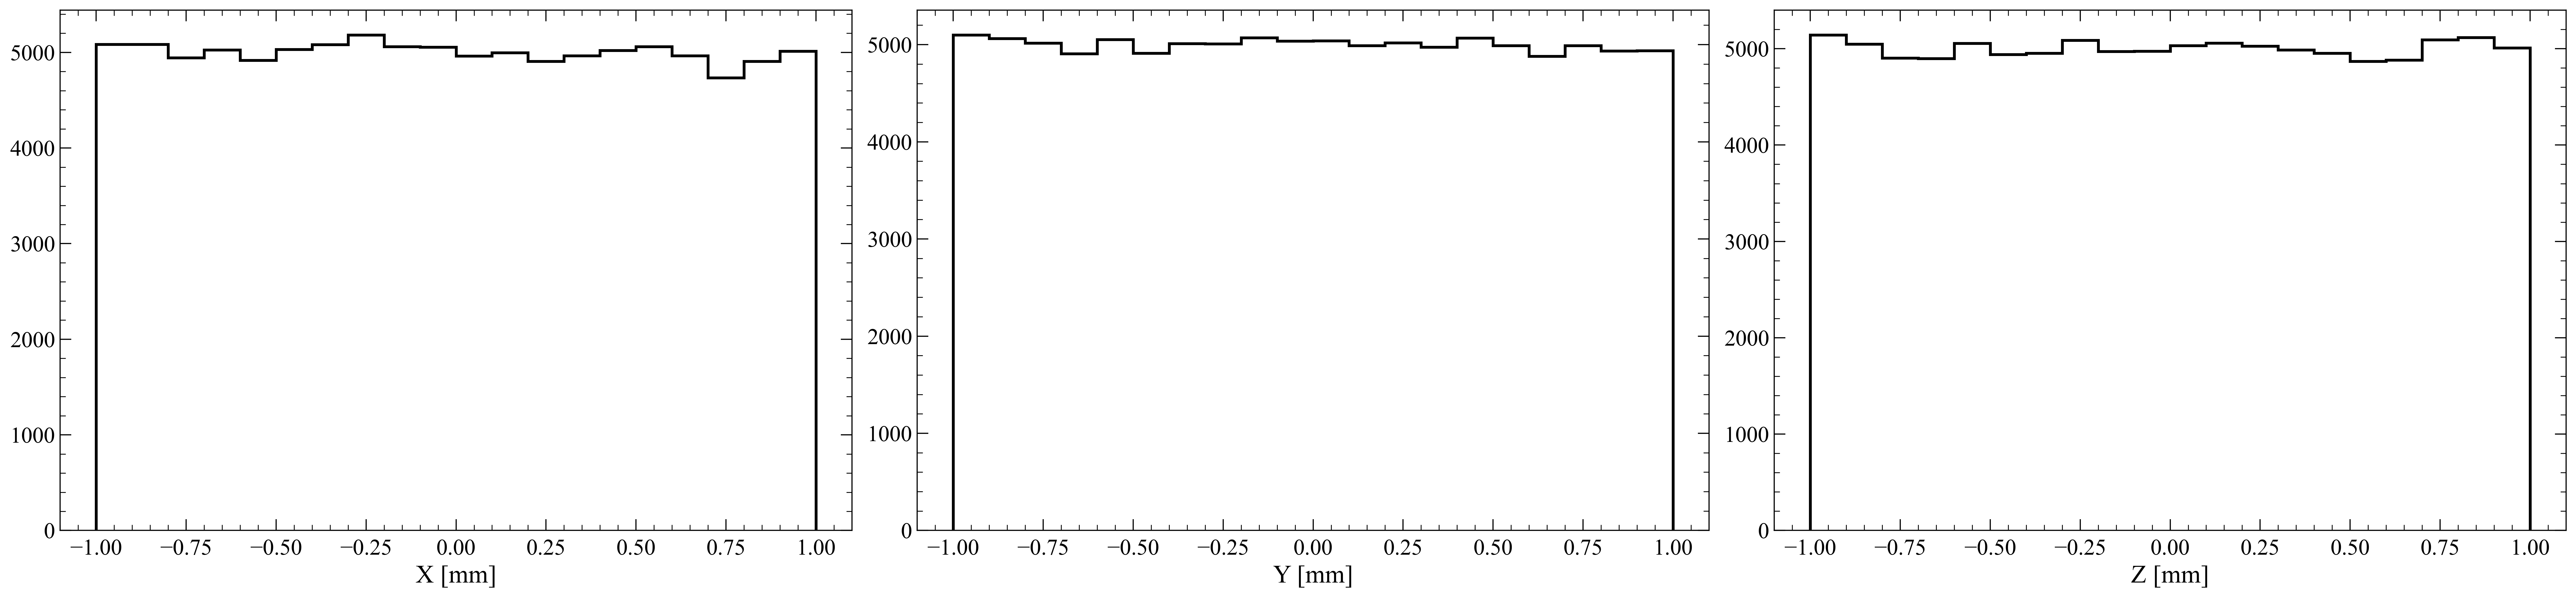

In [6]:
## ---------------------------------- ##
##       PLOT PRIMARY DIRECTION       ##
## ---------------------------------- ##
fig, ax = plt.subplots(1,3, figsize = (25.5,6), dpi=400)

ax[0].hist(dictList['primaryDirX'], bins=20, range=[-1.,1.], histtype='step', lw=2, color='black')
ax[1].hist(dictList['primaryDirY'], bins=20, range=[-1.,1.], histtype='step', lw=2, color='black')
ax[2].hist(dictList['primaryDirZ'], bins=20, range=[-1.,1.], histtype='step', lw=2, color='black')

ax[0].set_xlabel('X [mm]')

ax[1].set_xlabel('Y [mm]')

ax[2].set_xlabel('Z [mm]')

fig.tight_layout()

(1, 100)

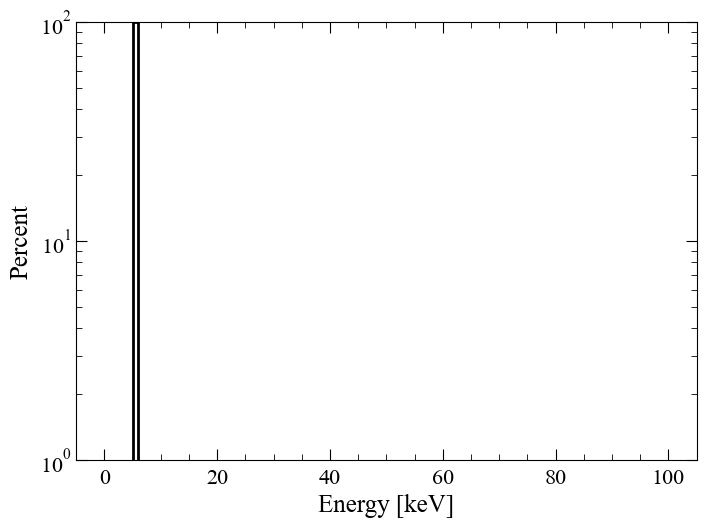

In [7]:
## ---------------------------------- ##
##    Plot PRIMARY ENERGY SPECTRA     ##
## ---------------------------------- ##

fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(dictList['primaryParticleEnergy'], bins=100, range=[0,100], histtype='step', align='mid',
        color='black', lw=2, weights=[100/float(nEvents) for i in range(nEvents)])

ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(1,100)

(0.2, 100)

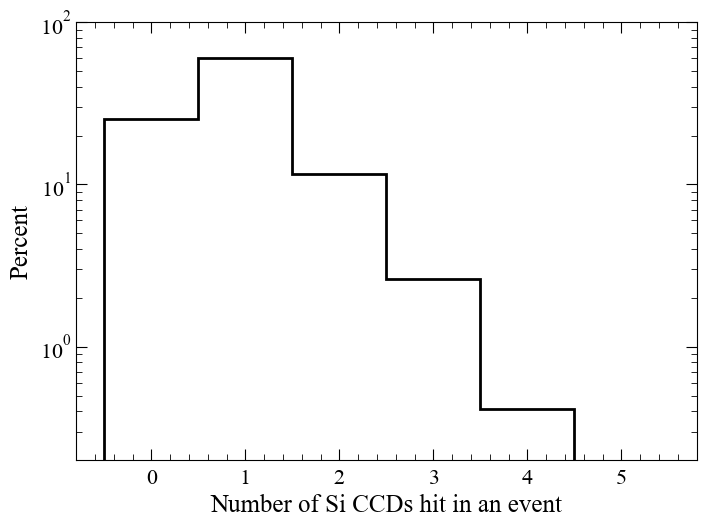

In [8]:
## ---------------------------------- ##
##  Plot Multiplicity of Si CCDs hit  ##
## ---------------------------------- ##

fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(dictList['numSiPanelsHit'], bins=6, range=[0,6], histtype='step', align='left',
        color='black', lw=2, weights=[100/float(nEvents) for i in range(nEvents)])

ax.set_xlabel('Number of Si CCDs hit in an event')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(2e-1,100)


(0.002, 100)

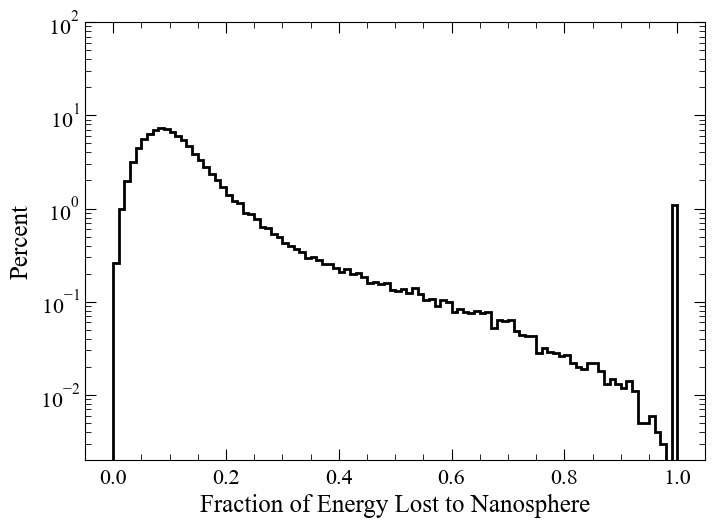

In [9]:
## -------------------------------------------- ##
##  Plot Fraction of Energy Lost to nanosphere  ##
## -------------------------------------------- ##

fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(dictList['totEdepAllVol']["nanosphere"]/dictList['primaryParticleEnergy'], bins=100, range=[0,1], histtype='step', align='mid',
        color='black', lw=2, weights=[100/float(nEvents) for i in range(nEvents)])

ax.set_xlabel('Fraction of Energy Lost to Nanosphere')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(2e-3,100)

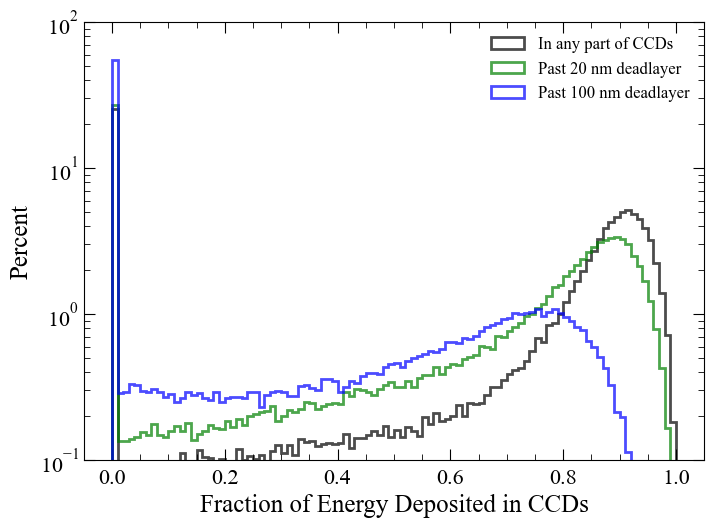

In [11]:
## ------------------------------------------------ ##
##   PLOT FRACTION OF ENERGY DEPOSITED IN ANY CCD   ##
## ------------------------------------------------ ##

totEdepCombined, totEdepCombined_20nm, totEdepCombined_100nm = np.zeros(nEvents), np.zeros(nEvents), np.zeros(nEvents)

## Check total energy dep in all volumes
for vol in dictList['totEdepAllVol']:
    if vol == 'nanosphere':
        continue
    Edep_arr = dictList['totEdepAllVol'][vol]
    totEdepCombined += Edep_arr

## check total energy dep past 100 nm deadlayer 
for vol in dictList['totEdepCCDVol_20nm']:
    Edep_arr = dictList['totEdepCCDVol_20nm'][vol]
    totEdepCombined_20nm += Edep_arr

## check total energy dep past 100 nm deadlayer 
for vol in dictList['totEdepCCDVol_100nm']:
    Edep_arr = dictList['totEdepCCDVol_100nm'][vol]
    totEdepCombined_100nm += Edep_arr

## PLOTTING
fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(totEdepCombined/dictList['primaryParticleEnergy'], bins=100, range=[0,1], histtype='step', align='mid', alpha = 0.7, 
        color='black', lw=2, weights=[100/float(nEvents) for i in range(nEvents)], label='In any part of CCDs')

ax.hist(totEdepCombined_20nm/dictList['primaryParticleEnergy'], bins=100, range=[0,1], histtype='step', align='mid', alpha = 0.7, 
        color='green', lw=2, weights=[100/float(nEvents) for i in range(nEvents)], label='Past 20 nm deadlayer')

ax.hist(totEdepCombined_100nm/dictList['primaryParticleEnergy'], bins=100, range=[0,1], histtype='step', align='mid', alpha = 0.7, 
        color='blue', lw=2, weights=[100/float(nEvents) for i in range(nEvents)], label='Past 100 nm deadlayer')

ax.set_xlabel('Fraction of Energy Deposited in CCDs')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(1e-1,100)
ax.legend(frameon=False, loc='upper right', fontsize=12)

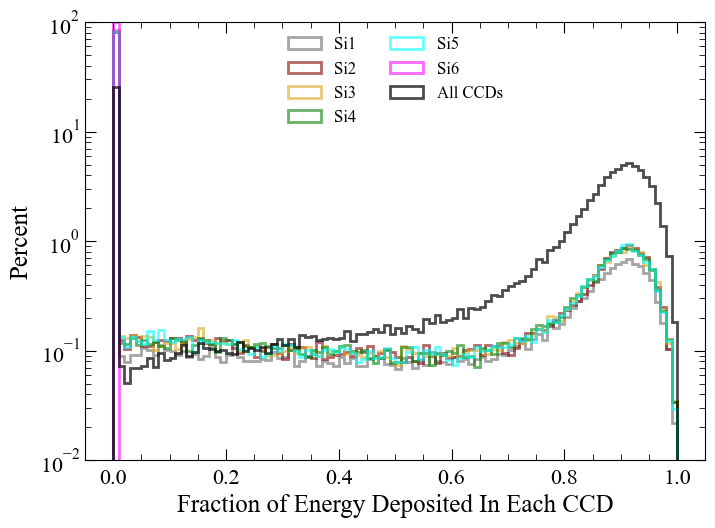

In [12]:
## ------------------------------------------------ ##
##          Fraction of Edep in Each CCD            ##
## ------------------------------------------------ ##

color_list = ['red', 'dimgray', 'maroon', 'goldenrod', 'green', 'cyan', 'magenta']

fig, ax = plt.subplots(1,1, dpi=100)

totEdepCombined =  np.zeros(nEvents)
## Check total energy dep in all volumes
for idx, vol in enumerate(dictList['totEdepAllVol']):
    if vol == 'nanosphere':
        continue
    Edep_arr = dictList['totEdepAllVol'][vol]
    totEdepCombined += Edep_arr

    ax.hist(Edep_arr/dictList['primaryParticleEnergy'],  bins=100, range=[0,1], histtype='step', align='mid', alpha = 0.6, lw=2,
            color = color_list[idx], weights=[100/float(nEvents) for i in range(nEvents)], label=vol)

ax.hist(totEdepCombined/dictList['primaryParticleEnergy'], bins=100, range=[0,1], histtype='step', align='mid', alpha = 0.7, 
        color='black', lw=2, weights=[100/float(nEvents) for i in range(nEvents)], label='All CCDs')


ax.set_xlabel('Fraction of Energy Deposited In Each CCD')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(1e-2,100)
ax.legend(frameon=False, loc='upper center', fontsize=12, ncol=2)